# Animate data points and mean line for the data

## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np

### Displaying animation in the notebook

Choose only one option and comment out another.

In [2]:
# Option 1
# %matplotlib qt

In [3]:
# Option 2
from IPython.display import HTML

## Data

In [4]:
data = np.random.rand(20)

data

array([0.80793129, 0.3183495 , 0.1505114 , 0.91686709, 0.74738935,
       0.61676075, 0.26779   , 0.4573239 , 0.18282476, 0.71471796,
       0.09683455, 0.42893922, 0.1879864 , 0.008911  , 0.97332239,
       0.62526465, 0.61964672, 0.63544852, 0.817039  , 0.97811176])

In [5]:
x_vals = list(range(len(data)))
x_vals

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

## Animate data points and the mean line using `ax.plot()`

### Mean line as a horizontal line

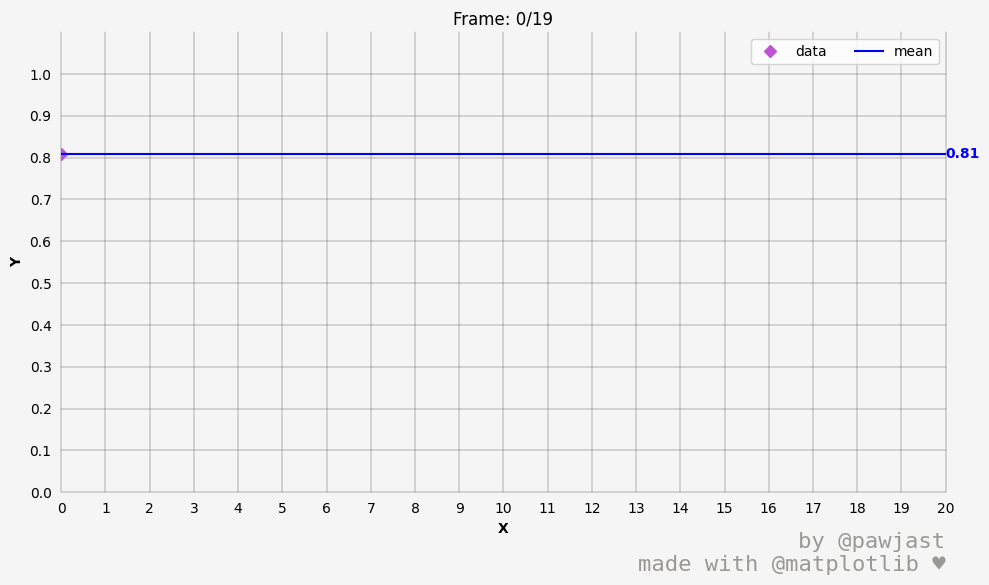

In [6]:
# CREATE FIGURE AND AXES
fig, ax = plt.subplots(
    figsize=(10, 6),
    facecolor="whitesmoke",
    layout="tight"
)

# STYLIZE THE PLOT
ax.set_frame_on(False)  # remove bg colour and spines

ax.set_xlabel("X", weight="bold")
ax.set_ylabel("Y", weight="bold")

ax.set_xlim(0, 20)
ax.set_ylim(0, 1.1)
ax.set_xticks(
    ticks=range(0, 20+1)
)
ax.set_yticks(
    ticks=np.arange(0, 1.1, 0.1)
)
ax.tick_params(
    color=(0, 0, 0, 0)
)

ax.grid(
    color="dimgray",
    lw=0.35,
    clip_on=False,
)

# Footer
ax.text(
    1, -0.18,
    "by @pawjast\nmade with @matplotlib \u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=16,
    family="monospace",
    weight="medium"
)

# SET UP AND STYLIZE EMPTY PLOT THAT'S GOING TO BE ANIMATED
my_data, = ax.plot(
    [], [],
    color="mediumorchid",
    lw=0,
    marker="D",
    markersize=6,
    label="data"
)

mean_line = ax.axhline(
    xmin=0,
    xmax=1,
    y=0,
    label="mean",
    color="blue"
)


txt_mean = ax.text(
    ax.get_xlim()[1], 0,
    s="",
    color="blue",
    va="center",
    ha="left",
    weight="bold"
)

ax.legend(
    loc="upper right",
    ncols=2
)


# CREATE FRAME UPDATE FUNCTION
def update(frame):
    "Update data for each frame"

    # Update values to plot based on the frame
    x = x_vals[:frame+1]
    y = data[:frame+1]

    # Update data plot values
    my_data.set_xdata(x)
    my_data.set_ydata(y)

    # Calculate mean value
    mean_val = np.mean(y)

    # Update mean value label
    txt_mean.set_y(mean_val)
    txt_mean.set_text(f"{mean_val:.2f}")

    # Update mean plot value
    mean_line.set_ydata([mean_val])

    ax.set_title(f"Frame: {frame}/{len(data)-1}")

    return my_data, mean_line


# RUN THE ANIMATION
ani = animation.FuncAnimation(
    fig=fig,
    func=update,
    frames=len(data),
    interval=350,
);

In [7]:
HTML(ani.to_jshtml())

### Save to a file

In [8]:
ani.save(filename="02_mean_line.mp4", writer="ffmpeg")